In [181]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [182]:
def LoadData():
    Data = np.loadtxt('testSet.txt')
    return np.insert(Data[:,:-1].astype(float), obj = 0, values = 1, axis = 1), Data[:,-1].astype(int)
def Sigmoid(X):
    return 1.0 / (1 + np.exp(-X))
def GradientDescent(dataMat, label):
    alpha = 0.01
    MaxCycle = 500
    dataMat = np.mat(dataMat)
    label = np.mat(label).T
    h, w = dataMat.shape
    theta = np.ones((w, 1))
    for cycle in range(MaxCycle):
        sigmoid = Sigmoid(dataMat * theta)
        diff = label - sigmoid
        theta = theta + alpha * dataMat.T * diff
    return theta
def StoGradDescent(dataMat, label, numIter = 50):
    alpha = 0.01
    m, n = dataMat.shape
    theta = np.ones(n)
    for num in range(numIter):
        dataIndex = list(range(m))
        count = 0
        while(len(dataIndex) != 0):
            randNum = int(np.random.uniform(0, len(dataIndex)))
            randIndex = dataIndex[randNum]
            del dataIndex[randNum]
            alpha = 1/(1 + count + num) + 0.01
            sigmoid = Sigmoid(sum(dataMat[randIndex] * theta))
            diff = label[randIndex] - sigmoid
            theta = theta + alpha * diff * dataMat[randIndex]
            count += 1
    return np.array(theta)
def plotBestFit():
    dataMat, label = LoadData()
    dataArr = np.array(dataMat)
    #weight = GradientDescent(dataMat, label)
    weight = StoGradDescent(dataMat, label)
    try:
        weight = weight.getA()
    except:
        pass
    xcoor1 = []
    ycoor1 = []
    xcoor2 = []
    ycoor2 = []
    for i in range(dataArr.shape[0]):
        if int(label[i]) == 1:
            xcoor1.append(dataArr[i, 1])
            ycoor1.append(dataArr[i, 2])
        else:
            xcoor2.append(dataArr[i, 1])
            ycoor2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcoor1, ycoor1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcoor2, ycoor2, s = 30, c = 'green')
    X = np.arange(-3.0, 3.0, 0.1)
    Y = (-weight[0] - weight[1] * X) / weight[2]
    ax.plot(X, Y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
def ClassifyCategory(Datas, weights):
    data = Datas * weights
    result = []
    for row in data:
        if Sigmoid(sum(row)) >= 0.5:
            result.append(1)
        else:
            result.append(0)
    return result

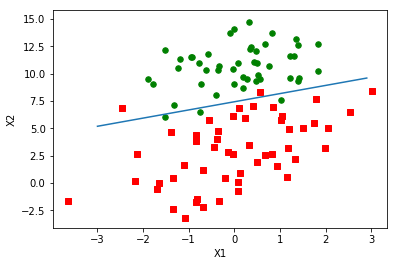

In [183]:
plotBestFit()

In [180]:
MeanErrorRate = []
for i in range(20):
    # fatality from colic
    TrainingData = np.loadtxt('horseColicTraining.txt')
    TrainingFeatures = TrainingData[:,:-1].astype(float)
    TrainingLabels = TrainingData[:,-1].astype(int)
    weights = StoGradDescent(TrainingFeatures, TrainingLabels)
    TestgData = np.loadtxt('horseColicTest.txt')
    TestFeatures = TestgData[:,:-1].astype(float)
    TestLabels = TestgData[:,-1].astype(int)
    PredictedLabels = ClassifyCategory(TestFeatures, weights)
    error = 0
    for i in range(len(PredictedLabels)):
        if PredictedLabels[i] != TestLabels[i]:
            error += 1
    print('Error rate is {}'.format(error/len(TestLabels)))
    MeanErrorRate.append(error/len(TestLabels))
print('Mean error rate is {}'.format(np.mean(MeanErrorRate)))

Error rate is 0.19402985074626866
Error rate is 0.29850746268656714
Error rate is 0.26865671641791045
Error rate is 0.3582089552238806
Error rate is 0.31343283582089554
Error rate is 0.29850746268656714
Error rate is 0.23880597014925373
Error rate is 0.31343283582089554
Error rate is 0.4626865671641791
Error rate is 0.417910447761194
Error rate is 0.417910447761194
Error rate is 0.2537313432835821
Error rate is 0.43283582089552236
Error rate is 0.43283582089552236
Error rate is 0.7014925373134329
Error rate is 0.29850746268656714
Error rate is 0.5522388059701493
Error rate is 0.26865671641791045
Error rate is 0.3283582089552239
Error rate is 0.417910447761194
Mean error rate is 0.36343283582089553


In [171]:
(TestFeatures * weights)[0]

array([ 2.63680227e+01, -6.63349496e-01,  1.11988332e+02, -7.93009951e+01,
        1.34735677e+01, -0.00000000e+00, -5.34905981e+00, -2.91795038e+01,
        1.05837081e-01, -3.06486969e+01,  4.36543951e+01, -1.52023960e+00,
        2.96005062e+01, -5.64876660e+00, -3.40567444e+01,  0.00000000e+00,
       -8.02424073e+00,  1.22456019e+00, -1.55479909e+00, -0.00000000e+00,
       -0.00000000e+00])